In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

In [2]:
!hostname -i

10.197.16.117


In [6]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                  velocity=velocity,
                  temperature=temperature,
                  bowen_ratio=bowen_ratio,
                  microphysic=microphysic)

simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


In [8]:
simu.dataset_2d.LWNT

<xarray.DataArray 'LWNT' (time: 481, y: 128, x: 128)>
[7880704 values with dtype=float32]
Coordinates:
  * x        (x) float32 0.0 1e+03 2e+03 3e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * y        (y) float32 0.0 1e+03 2e+03 3e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * time     (time) float32 30.25 30.26 30.27 30.28 ... 35.22 35.23 35.24 35.25
Attributes:
    long_name:  Net LW at TOA
    units:      W/m2

In [9]:
from pySAMetrics.config import HEAT_CAPACITY_AIR

In [10]:
print(simu.dataset_3d.z.units)
print(simu.dataset_1d.RHO.units)
print(simu.dataset_1d.RADQR.units)
print(simu.dataset_1d.LHF.units)
print(simu.dataset_1d.SHF.units)

m
kg/m3
K/day
W/m2
W/m2


In [11]:
dz = np.gradient(simu.dataset_3d.z.values)
rad = np.sum((simu.dataset_1d.RADQR/(24*3600)) * simu.dataset_1d.RHO *dz, axis=-1)

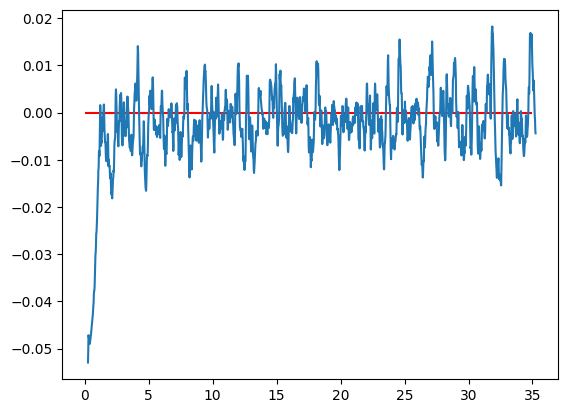

In [12]:

plt.hlines(0, 0,35, color='r')
plt.plot(simu.dataset_1d.time.values, rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR)

In [13]:
velocities = ['0', '2.5', '5', '10', '20']
bowen_ratios = ['0.1', '0.5', '1']
temperatures = ['295', '300', '302', '305']

In [14]:
from tqdm import tqdm

In [15]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

simu_list_shear=[]
for velocity in tqdm(velocities):
    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)
    simu_list_shear.append(simu)

  0%|                                                                                   | 0/5 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


 20%|███████████████                                                            | 1/5 [00:01<00:04,  1.16s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64.nc'}


 40%|██████████████████████████████                                             | 2/5 [00:04<00:08,  2.70s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U5_SAM1MOM_B1_128x128x64.nc'}


 60%|█████████████████████████████████████████████                              | 3/5 [00:09<00:06,  3.32s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U10_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U10_SAM1MOM_B1_128x128x64.nc'}


 80%|████████████████████████████████████████████████████████████               | 4/5 [00:12<00:03,  3.37s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U20_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U20_SAM1MOM_B1_128x128x64.nc'}


100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.30s/it]


In [16]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

simu_list_bowen=[]
for bowen_ratio in tqdm(bowen_ratios):
    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)
    
    simu_list_bowen.append(simu)

  0%|                                                                                   | 0/3 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64.nc'}


 33%|█████████████████████████                                                  | 1/3 [00:03<00:07,  3.85s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64.nc'}


 67%|██████████████████████████████████████████████████                         | 2/3 [00:07<00:03,  3.91s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


100%|███████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.97s/it]


In [17]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

simu_list_temp=[]
for temperature in tqdm(temperatures):
    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)
    simu_list_temp.append(simu)

  0%|                                                                                   | 0/4 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T295_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T295_U0_SAM1MOM_B1_128x128x64.nc'}


 25%|██████████████████▊                                                        | 1/4 [00:04<00:14,  4.76s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


 50%|█████████████████████████████████████▌                                     | 2/4 [00:05<00:05,  2.63s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T302_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T302_U0_SAM1MOM_B1_128x128x64.nc'}


 75%|████████████████████████████████████████████████████████▎                  | 3/4 [00:10<00:03,  3.58s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T305_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T305_U0_SAM1MOM_B1_128x128x64.nc'}


100%|███████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.96s/it]


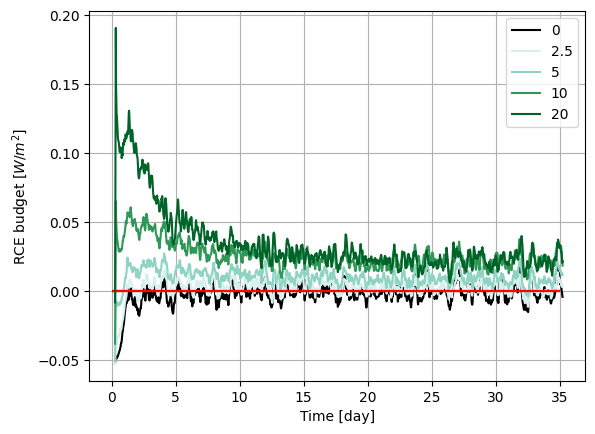

In [18]:
for simu in simu_list_shear:
    plt.hlines(0, 0,35, color='r')
    plt.plot(simu.dataset_1d.time.values, 
             rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR, 
             label=simu.velocity,
             color=simu.color)
    plt.legend()
    plt.xlabel('Time [day]')
    plt.ylabel(r'RCE budget [$W/m^2$]')
    plt.grid(True)

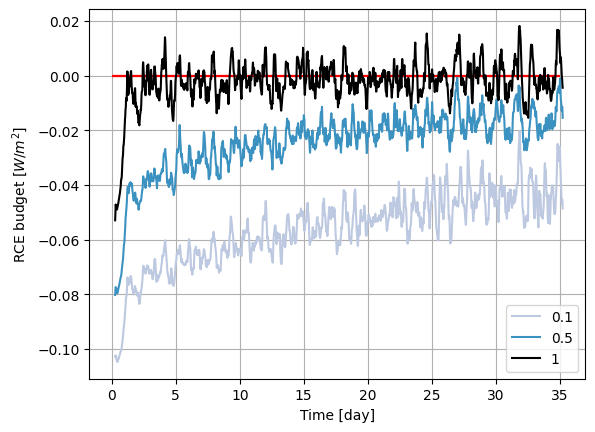

In [19]:
for simu in simu_list_bowen:
    plt.hlines(0, 0,35, color='r')
    plt.plot(simu.dataset_1d.time.values, 
             rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR, 
             label=simu.bowen_ratio,
             color=simu.color)
    plt.legend()
    plt.xlabel('Time [day]')
    plt.ylabel(r'RCE budget [$W/m^2$]')
    plt.grid(True)

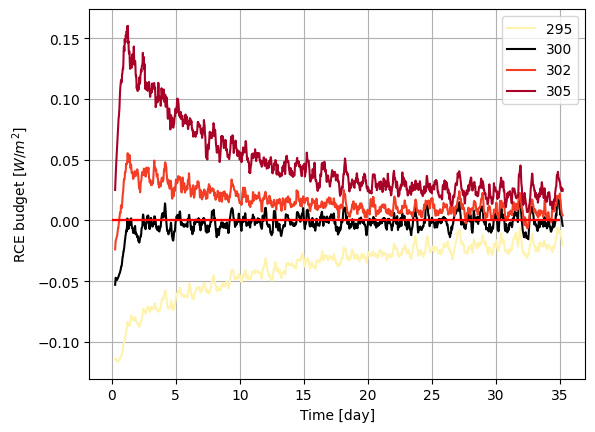

In [20]:
for simu in simu_list_temp:
    plt.hlines(0, 0,35, color='r')
    plt.plot(simu.dataset_1d.time.values, 
             rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR, 
             label=simu.temperature,
             color=simu.color)
    plt.legend()
    plt.xlabel('Time [day]')
    plt.ylabel(r'RCE budget [$W/m^2$]')
    plt.grid(True)

In [21]:
unique_simus= {simu.name: simu for simu in simu_list_temp + simu_list_shear + simu_list_bowen}.values()

In [22]:
for simu in unique_simus:
    print(simu.name)

SAM_RCE_V0_T295_B1_M1
SAM_RCE_V0_T300_B1_M1
SAM_RCE_V0_T302_B1_M1
SAM_RCE_V0_T305_B1_M1
SAM_RCE_V2.5_T300_B1_M1
SAM_RCE_V5_T300_B1_M1
SAM_RCE_V10_T300_B1_M1
SAM_RCE_V20_T300_B1_M1
SAM_RCE_V0_T300_B0.1_M1
SAM_RCE_V0_T300_B0.5_M1


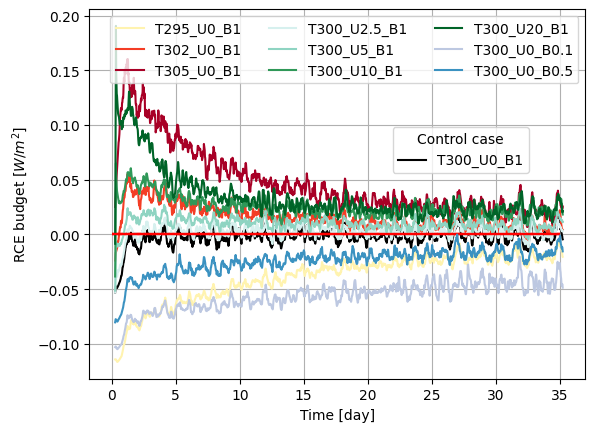

In [23]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# List to store plot handles for the two legend boxes
legend_if = []
legend_else = []

# Loop over simulations and plot
for simu in unique_simus:
    if simu.name == 'SAM_RCE_V0_T300_B1_M1':
        # Plot and store the handles for 'if' condition
        line, = plt.plot(simu.dataset_1d.time.values, 
                         rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR, 
                         label=f'T{simu.temperature}_U{simu.velocity}_B{simu.bowen_ratio}',
                         color=simu.color)
        legend_if.append(line)
    else:
        # Plot horizontal line and other plot for 'else' condition
        plt.hlines(0, 0, 35, color='r')  # Constant red line
        line, = plt.plot(simu.dataset_1d.time.values, 
                         rad + simu.dataset_1d.SHF/HEAT_CAPACITY_AIR + simu.dataset_1d.LHF/HEAT_CAPACITY_AIR, 
                         label=f'T{simu.temperature}_U{simu.velocity}_B{simu.bowen_ratio}',
                         color=simu.color)
        legend_else.append(line)

# Create the first legend box for the 'if' condition
legend1 = plt.legend(handles=legend_if, title='Control case', bbox_to_anchor=(0.9, 0.7))

# Add the second legend box for the 'else' condition
legend2 = plt.legend(handles=legend_else, loc='upper right', ncols=3)

# Add the first legend back to the plot (to avoid it being removed)
plt.gca().add_artist(legend1)

# General plot formatting
plt.xlabel('Time [day]')
plt.ylabel(r'RCE budget [$W/m^2$]')
plt.grid(True)
plt.show()


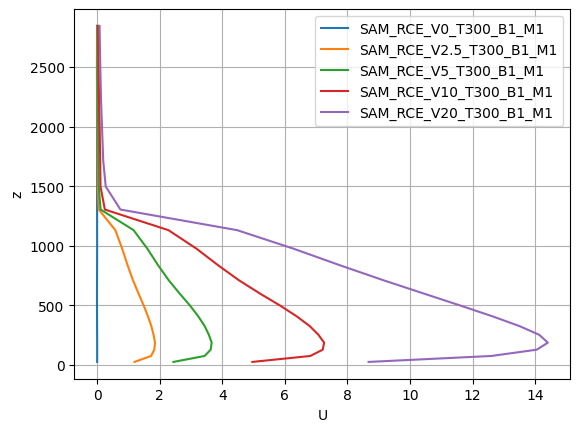

In [24]:
for simu in simu_list_shear:
    plt.plot( np.mean(simu.dataset_1d.U.values, axis=(0))[:20], simu.dataset_3d.z.values[:20], label=simu.name)
    plt.legend()
    plt.xlabel('U')
    plt.ylabel('z')
    plt.grid(True)

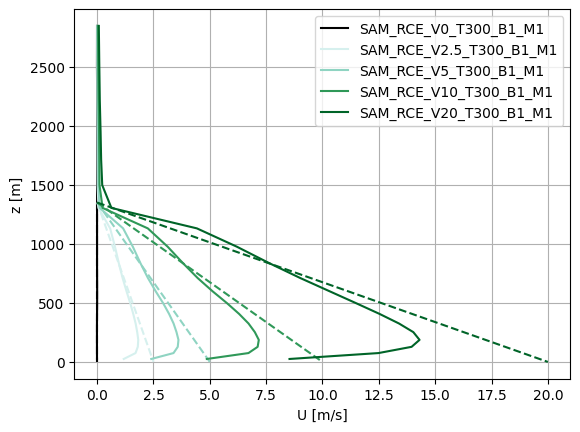

In [25]:
for simu in simu_list_shear:
    plt.plot(np.mean(simu.dataset_3d.U.values, axis=(0,2,3))[:20], simu.dataset_3d.z.values[:20], label=simu.name, color=simu.color)
    vel =float(simu.velocity)
    plt.plot([0, vel], [1350, 0], linestyle='--', color=simu.color)
    plt.legend()
    plt.xlabel('U [m/s]')
    plt.ylabel('z [m]')
    plt.grid(True)

In [26]:
from pySAMetrics.utils_3d_functions import get_3d_image

In [27]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

simu_list_shear=[]
for velocity in tqdm(velocities):
    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    path_netcdf = paths['path_3d'] #3d
    path_netcdf_1d = paths['path_1d'] #3d

    #storage_path = f'/burg/glab_new/users/sga2133/image_storage_video/mass_flux_{file}'


    ds_1d=xr.open_dataset(path_netcdf_1d)
    ds = xr.open_dataset(path_netcdf)
    xr_var_2d = ds.TABS[:,0,:,:]
    xr_var_3d = ds.QN[ :, :, :] + ds.QP[ :, :, :]

    x= ds.x.values
    y= ds.y.values
    z= ds.z.values
    
    get_3d_image(i_time=100,
                xr_var_2d=xr_var_2d, 
                xr_var_3d=xr_var_3d,
                x=x, 
                y=y, 
                z=z,  
                outname=f'test_{velocity}')

  0%|                                                                                   | 0/5 [00:00<?, ?it/s]

 20%|███████████████                                                            | 1/5 [00:12<00:51, 12.86s/it]

test_0.jpeg
test_2.5.jpeg


 60%|█████████████████████████████████████████████                              | 3/5 [00:30<00:19,  9.63s/it]

test_5.jpeg


 80%|████████████████████████████████████████████████████████████               | 4/5 [00:38<00:09,  9.21s/it]

test_10.jpeg


100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:47<00:00,  9.43s/it]

test_20.jpeg


In [32]:
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic, folder_path='/burg/glab_new/users/sga2133/SAM_simulation_storage')

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                  velocity=velocity,
                  temperature=temperature,
                  bowen_ratio=bowen_ratio,
                  microphysic=microphysic)

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


In [33]:
simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')

In [7]:
simu.set_composite_variables(data_name='BUOYANCY', 
                             variable_to_look_for_extreme='Prec', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_2d',
                             dataset_for_variable_3d='dataset_computed_3d')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 481/481 [00:12<00:00, 40.01it/s]


In [20]:
simu.set_composite_variables(data_name='U', 
                             variable_to_look_for_extreme='Prec', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_2d',
                             dataset_for_variable_3d='dataset_3d')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 481/481 [00:12<00:00, 39.11it/s]


In [21]:
simu.set_composite_variables(data_name='BUOYANCY', 
                             variable_to_look_for_extreme='Prec', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_2d',
                             dataset_for_variable_3d='dataset_computed_3d')
                             
simu.set_composite_variables(data_name='U', 
                             variable_to_look_for_extreme='Prec', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_2d',
                             dataset_for_variable_3d='dataset_3d')

simu.set_composite_variables(data_name='V', 
                             variable_to_look_for_extreme='Prec', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_2d',
                             dataset_for_variable_3d='dataset_3d')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 481/481 [00:12<00:00, 39.22it/s]


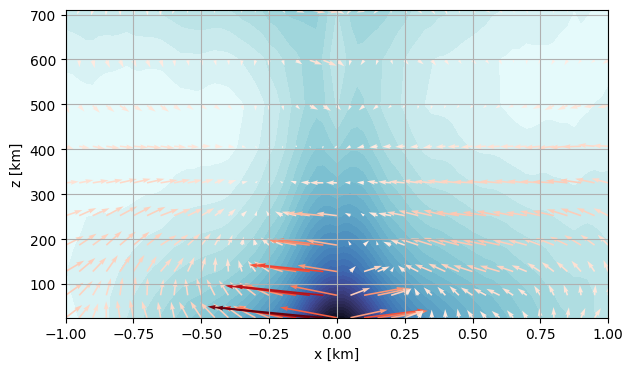

In [45]:
plt.figure(figsize=(7,4))
import cmocean
XX, ZZ = np.meshgrid(np.linspace(-1,1,81),simu.dataset_3d.z.values)
plt.contourf(XX[:10,:], ZZ[:10,:], np.mean(simu.BUOYANCY_composite_Prec[:10,:,:], axis=1), 35, cmap=cmocean.cm.ice)

norm = np.sqrt(np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2]**2 +np.mean(simu.V_composite_Prec[:10,:,:], axis=1)[:,::2]**2)
plt.quiver(XX[:10,:][:,::2], ZZ[:10,:][:,::2], np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2], np.mean(simu.V_composite_Prec[:10,:,:], axis=1)[:,::2], [norm], cmap='Reds')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.grid(True)


In [32]:
simu.set_composite_variables(data_name='BUOYANCY', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_computed_3d')

simu.set_composite_variables(data_name='U', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_3d')

simu.set_composite_variables(data_name='V', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_3d')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 481/481 [00:12<00:00, 38.92it/s]


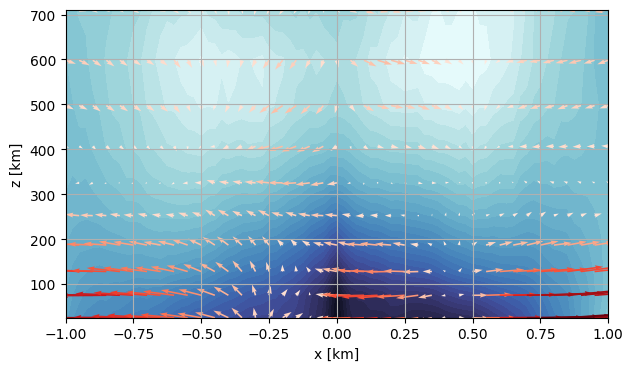

In [44]:
plt.figure(figsize=(7,4))
import cmocean
XX, ZZ = np.meshgrid(np.linspace(-1,1,81),simu.dataset_3d.z.values)

plt.contourf(XX[:10,:], ZZ[:10,:], np.mean(simu.BUOYANCY_composite_CAPE[:10,:,:], axis=1), 35, cmap=cmocean.cm.ice)


norm = np.sqrt(np.mean(simu.U_composite_CAPE[:10,:,:], axis=1)[:,::2]**2 +np.mean(simu.V_composite_CAPE[:10,:,:], axis=1)[:,::2]**2)
plt.quiver(XX[:10,:][:,::2], ZZ[:10,:][:,::2], np.mean(simu.U_composite_CAPE[:10,:,:], axis=1)[:,::2], np.mean(simu.V_composite_CAPE[:10,:,:], axis=1)[:,::2], [norm], cmap='Reds')



plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.grid(True)


In [ ]:
simu.set_composite_variables(data_name='BUOYANCY', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_computed_3d')

simu.set_composite_variables(data_name='U', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_3d')

simu.set_composite_variables(data_name='V', 
                             variable_to_look_for_extreme='CAPE', 
                             extreme_events_choice='max', 
                             x_margin=40,
                             y_margin=40,
                             dataset_for_variable_2d='dataset_computed_2d',
                             dataset_for_variable_3d='dataset_3d')

In [46]:
def quantile_interval_points(array:np.array, nstart:int, nt:int, quantile:float):
    arr = array[nstart:nstart+nt]
    
    lt, lx, ly = np.where(arr>np.quantile(arr,quantile))
    
    points_quantile = [[lx_i, ly_i] for (lx_i, ly_i) in zip( lx, ly)]
    return points_quantile

In [47]:
start = 0
list_of_percentile = [start]
for i in range(9 * 4):
    next_value = list_of_percentile[-1] + 0.1 / (10 ** (i // 9))
    list_of_percentile.append(next_value)


In [48]:
list_of_percentile

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9099999999999999,
 0.9199999999999999,
 0.9299999999999999,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 0.991,
 0.992,
 0.993,
 0.994,
 0.995,
 0.996,
 0.997,
 0.998,
 0.999,
 0.9991,
 0.9992,
 0.9993,
 0.9994,
 0.9994999999999999,
 0.9995999999999999,
 0.9996999999999999,
 0.9997999999999999,
 0.9998999999999999]

In [49]:
nn=len(list_of_percentile)

proba_1 = np.zeros((nn,nn))
proba_ind = np.zeros((nn,nn))
ratio_proba = np.zeros((nn,nn))

nt=5


for k, q1 in tqdm(enumerate(list_of_percentile)): 
    for l, q2 in enumerate(list_of_percentile):
        P_q = quantile_interval_points(array=simu.dataset_2d.Prec.values, nstart=11, nt=nt, quantile=q1)
        C_q = quantile_interval_points(array=simu.dataset_computed_2d.CAPE, nstart=10, nt=nt, quantile=q2)

        N_i = len(P_q)
        N_j = len(C_q)
        N_ij = sum([C_q[i] in P_q for i in range(len(C_q))])

        proba = N_ij/(128*128*nt)
        #proba_indep = (N_i*N_j)/(128*128*nt)**2
        
        proba_indep=(1-q1)*(1-q2)
        
        proba_1[k,l] = proba
        proba_ind[k,l] = (1-q1)*(1-q2)
        ratio_proba[k,l] = proba/proba_indep

    


37it [30:19, 49.16s/it] 


Text(0, 0.5, 'CAPE (perc. rank $\\%$) ')

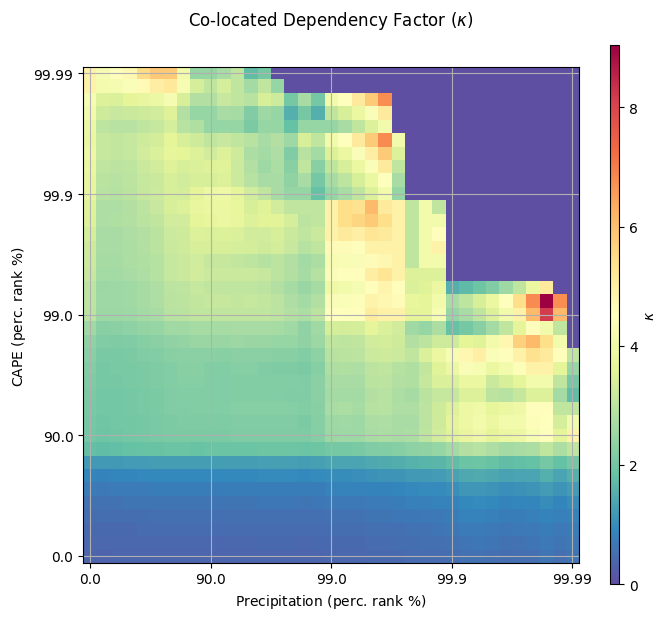

In [50]:
fig, ax = plt.subplots(figsize=(8,7))
test = ratio_proba
im = ax.imshow(test[:,:], cmap='Spectral_r')
#im.set_clim(-1,5.5)
plt.colorbar(im, orientation='vertical', label=r'$\kappa$', aspect=60)

ax.set_xticks(np.linspace(0,36,37)[::9])
ax.set_xticklabels(np.round(list_of_percentile,4,)[::9]*100)

ax.set_yticks(np.linspace(0,36,37)[::9])
ax.set_yticklabels(np.round(list_of_percentile,4,)[::9]*100)

plt.gca().invert_yaxis()

plt.grid('True', which="both", ls="-")


plt.title(r'Co-located Dependency Factor ($\kappa$)', pad=30) 

plt.xlabel(r'Precipitation (perc. rank $\%$)')
plt.ylabel(r'CAPE (perc. rank $\%$) ')




In [29]:
nn=len(list_of_percentile)

proba_1 = np.zeros((nn,nn))
proba_ind = np.zeros((nn,nn))
ratio_proba = np.zeros((nn,nn))

nt=5


for k, q1 in tqdm(enumerate(list_of_percentile)): 
    for l, q2 in enumerate(list_of_percentile):
        P_q = quantile_interval_points(array=simu.dataset_2d.Prec.values, nstart=11, nt=nt, quantile=q1)
        C_q = quantile_interval_points(array=simu.dataset_computed_2d.CR, nstart=10, nt=nt, quantile=q2)

        N_i = len(P_q)
        N_j = len(C_q)
        N_ij = sum([C_q[i] in P_q for i in range(len(C_q))])

        proba = N_ij/(128*128*nt)
        #proba_indep = (N_i*N_j)/(128*128*nt)**2
        
        proba_indep=(1-q1)*(1-q2)
        
        proba_1[k,l] = proba
        proba_ind[k,l] = (1-q1)*(1-q2)
        ratio_proba[k,l] = proba/proba_indep

    


NameError: name 'list_of_percentile' is not defined

NameError: name 'ratio_proba' is not defined

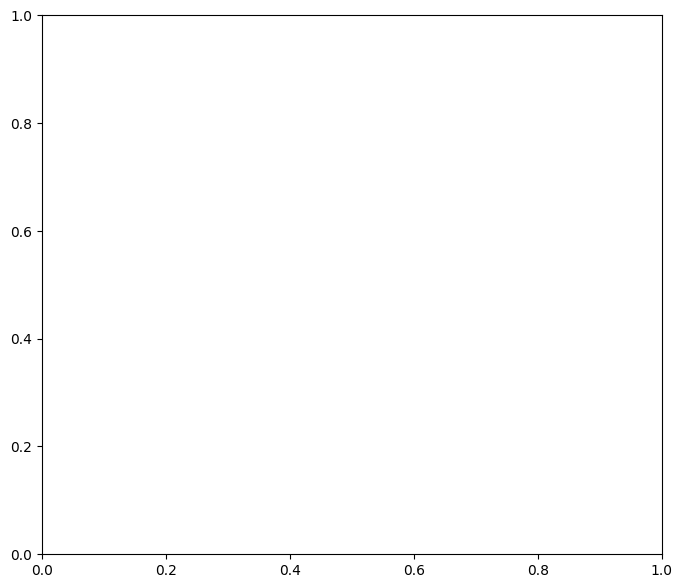

In [30]:
fig, ax = plt.subplots(figsize=(8,7))
test = ratio_proba
im = ax.imshow(test[:,:], cmap='Spectral_r')
#im.set_clim(-1,5.5)
plt.colorbar(im, orientation='vertical', label=r'$\kappa$', aspect=60)

ax.set_xticks(np.linspace(0,36,37)[::9])
ax.set_xticklabels(np.round(list_of_percentile,4,)[::9]*100)

ax.set_yticks(np.linspace(0,36,37)[::9])
ax.set_yticklabels(np.round(list_of_percentile,4,)[::9]*100)

plt.gca().invert_yaxis()

plt.grid('True', which="both", ls="-")


plt.title(r'Co-located Dependency Factor ($\kappa$)', pad=30) 

plt.xlabel(r'Precipitation (perc. rank $\%$)')
plt.ylabel(r'CR (perc. rank $\%$) ')




In [31]:
np.unique(simu.dataset_computed_2d.CP_LABELS)

AttributeError: 'Simulation' object has no attribute 'dataset_computed_2d'

In [64]:
idx_cp = np.where(simu.dataset_computed_2d.CP_LABELS==200)

In [66]:
qv_sfc = simu.dataset_3d.QV[:,0].values

In [70]:
np.unique(idx_cp[0])

array([167, 168, 169, 170, 171, 172, 173, 174, 175, 176])

In [87]:
label_cp = 200
qv_sfc = simu.dataset_3d.QV[:,0].values
labels_list = np.unique(simu.dataset_computed_2d.CP_LABELS)
cp_qv_list=[]
for label_cp in tqdm(labels_list):
    idx_cp = np.where(simu.dataset_computed_2d.CP_LABELS==label_cp)
    qv_list =[]
    for i_t in np.unique(idx_cp[0]):
        idx_t = np.where(simu.dataset_computed_2d.CP_LABELS[i_t]==label_cp)
        qv_sfc_it = qv_sfc[i_t]
        #qv_list.append(np.quantile(qv_sfc_it[idx_t], 0.9))
        qv_list.append(np.mean(qv_sfc_it[idx_t]))
    cp_qv_list.append(qv_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 582/582 [00:11<00:00, 50.64it/s]


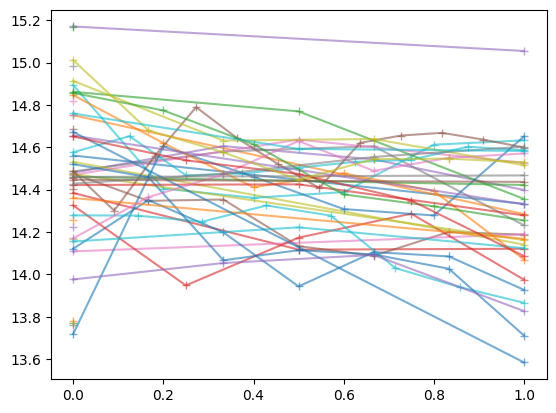

In [88]:
for qv_list in cp_qv_list[100:150]:
    plt.plot(np.linspace(0,1, len(qv_list)), qv_list, '+-', alpha=0.6)

In [89]:
label_cp = 200
qv_sfc = simu.dataset_computed_3d.BUOYANCY[:,0].values
labels_list = np.unique(simu.dataset_computed_2d.CP_LABELS)
cp_qv_list=[]
for label_cp in tqdm(labels_list):
    idx_cp = np.where(simu.dataset_computed_2d.CP_LABELS==label_cp)
    qv_list =[]
    for i_t in np.unique(idx_cp[0]):
        idx_t = np.where(simu.dataset_computed_2d.CP_LABELS[i_t]==label_cp)
        qv_sfc_it = qv_sfc[i_t]
        #qv_list.append(np.quantile(qv_sfc_it[idx_t], 0.9))
        qv_list.append(np.mean(qv_sfc_it[idx_t]))
    cp_qv_list.append(qv_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 582/582 [00:11<00:00, 50.82it/s]


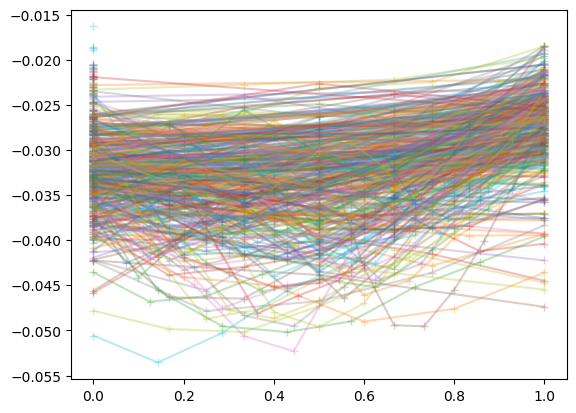

In [92]:
for qv_list in cp_qv_list[1:]:
    plt.plot(np.linspace(0,1, len(qv_list)), qv_list, '+-', alpha=0.3)

In [93]:
diff =[]
for qv_list in cp_qv_list[1:]:
    diff.append(qv_list[-1]-qv_list[0])

0.003869957


(array([  2.,   2.,  20., 196., 141., 111.,  64.,  32.,   9.,   4.]),
 array([-0.01438094, -0.01059261, -0.00680427, -0.00301593,  0.0007724 ,
         0.00456074,  0.00834908,  0.01213741,  0.01592575,  0.01971409,
         0.02350242]),
 <BarContainer object of 10 artists>)

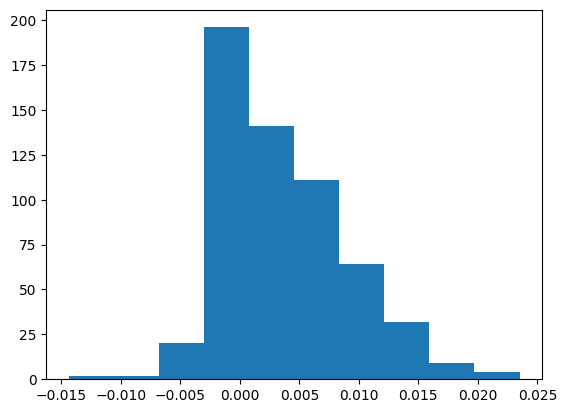

In [95]:
print(np.mean(diff))
plt.hist(diff)

In [96]:
label_cp = 200
qv_sfc = simu.dataset_computed_3d.FMSE[:,0].values
labels_list = np.unique(simu.dataset_computed_2d.CP_LABELS)
cp_qv_list=[]
for label_cp in tqdm(labels_list):
    idx_cp = np.where(simu.dataset_computed_2d.CP_LABELS==label_cp)
    qv_list =[]
    for i_t in np.unique(idx_cp[0]):
        idx_t = np.where(simu.dataset_computed_2d.CP_LABELS[i_t]==label_cp)
        qv_sfc_it = qv_sfc[i_t]
        #qv_list.append(np.quantile(qv_sfc_it[idx_t], 0.9))
        qv_list.append(np.mean(qv_sfc_it[idx_t]))
    cp_qv_list.append(qv_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 582/582 [00:11<00:00, 50.89it/s]


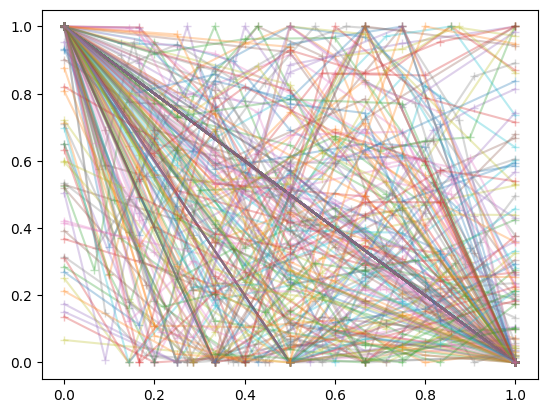

In [103]:
for qv_list in cp_qv_list[1:]:
    if (np.max(qv_list) - np.min(qv_list))!=0:
        if qv_list[0]-np.min(qv_list)>0:
            if qv_list[1]-qv_list[0]<0:
                plt.plot(np.linspace(0,1, len(qv_list)), (qv_list-np.min(qv_list))/(np.max(qv_list) - np.min(qv_list)), '+-', alpha=0.3)
            else:
                None
        else:
            None
    else:
        None

In [104]:
label_cp = 200
qv_sfc = simu.dataset_computed_3d.VIRTUAL_TEMPERATURE[:,0].values
labels_list = np.unique(simu.dataset_computed_2d.CP_LABELS)
cp_qv_list=[]
for label_cp in tqdm(labels_list):
    idx_cp = np.where(simu.dataset_computed_2d.CP_LABELS==label_cp)
    qv_list =[]
    for i_t in np.unique(idx_cp[0]):
        idx_t = np.where(simu.dataset_computed_2d.CP_LABELS[i_t]==label_cp)
        qv_sfc_it = qv_sfc[i_t]
        #qv_list.append(np.quantile(qv_sfc_it[idx_t], 0.9))
        qv_list.append(np.mean(qv_sfc_it[idx_t]))
    cp_qv_list.append(qv_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 582/582 [00:11<00:00, 50.94it/s]


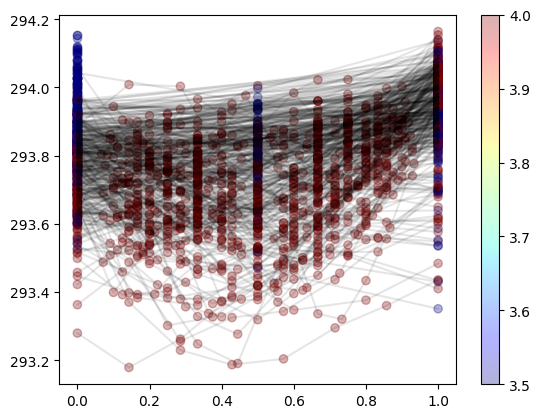

In [123]:
for qv_list in cp_qv_list[1:]:
    if len(qv_list)>4:
    plt.plot(np.linspace(0,1, len(qv_list)), qv_list, alpha=0.1, color='k')
    im = plt.scatter(np.linspace(0,1, len(qv_list)), qv_list, alpha=0.3, c=np.ones_like(qv_list)*len(qv_list), cmap='jet', vmin=3.5, vmax=4)
    
plt.colorbar()

In [34]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                velocity=velocity,
                temperature=temperature,
                bowen_ratio=bowen_ratio,
                microphysic=microphysic)

simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
simu_list.append(simu)

### add shear cases
for velocity in tqdm(['2.5', '5', '10', '20']):
    temperature='300'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add temp cases
for temperature in tqdm(['295', '302', '305']):
    velocity='0'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add bowen_ration cases
for bowen_ratio in tqdm(['0.1', '0.5']):
    velocity='0'
    temperature='300'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)



{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U5_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U10_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U10_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U20_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U20_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...
 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T295_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T295_U0_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T302_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T302_U0_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T305_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T305_U0_SAM1MOM_B1_128x128x64.nc'}


 ... (more hidden) ...
 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64.nc'}


 ... (more hidden) ...

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64.nc'}


 ... (more hidden) ...


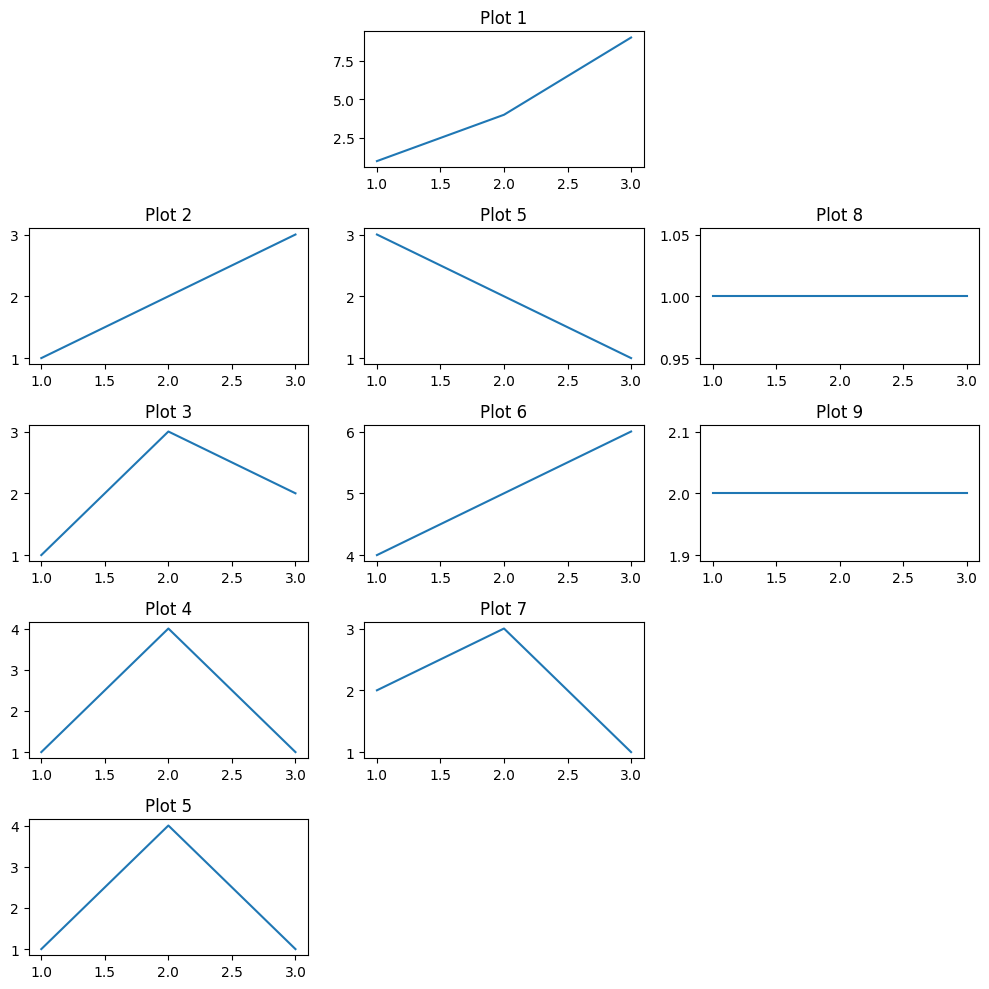

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 1, 1, 1,1])  # Adjust the grid

# First row: Empty except for the last column
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title("Plot 1")
ax1.plot([1, 2, 3], [1, 4, 9])

# Second row: First column has 3 plots
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title("Plot 2")
ax2.plot([1, 2, 3], [1, 2, 3])

ax3 = fig.add_subplot(gs[2, 0])
ax3.set_title("Plot 3")
ax3.plot([1, 2, 3], [1, 3, 2])

ax4 = fig.add_subplot(gs[3, 0])
ax4.set_title("Plot 4")
ax4.plot([1, 2, 3], [1, 4, 1])

ax5 = fig.add_subplot(gs[4, 0])
ax5.set_title("Plot 5")
ax5.plot([1, 2, 3], [1, 4, 1])

# Second column: 4 plots
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title("Plot 5")
ax5.plot([1, 2, 3], [3, 2, 1])

ax6 = fig.add_subplot(gs[2, 1])
ax6.set_title("Plot 6")
ax6.plot([1, 2, 3], [4, 5, 6])

ax7 = fig.add_subplot(gs[3, 1])
ax7.set_title("Plot 7")
ax7.plot([1, 2, 3], [2, 3, 1])

# Third column: 2 plots
ax8 = fig.add_subplot(gs[1, 2])
ax8.set_title("Plot 8")
ax8.plot([1, 2, 3], [1, 1, 1])

ax9 = fig.add_subplot(gs[2, 2])
ax9.set_title("Plot 9")
ax9.plot([1, 2, 3], [2, 2, 2])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [41]:
import cmocean

 ... (more hidden) ...


 ... (more hidden) ...
 ... (more hidden) ...


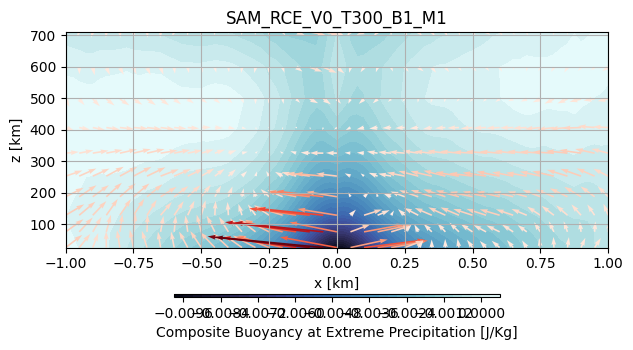

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


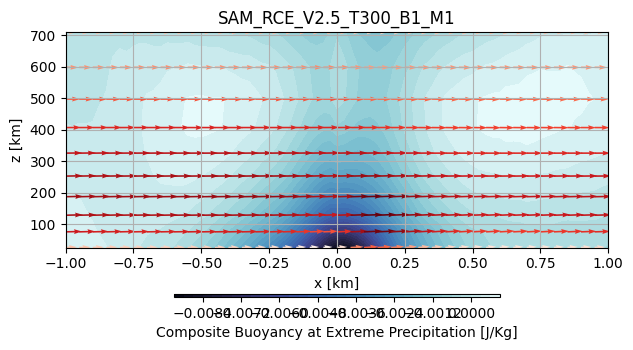

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


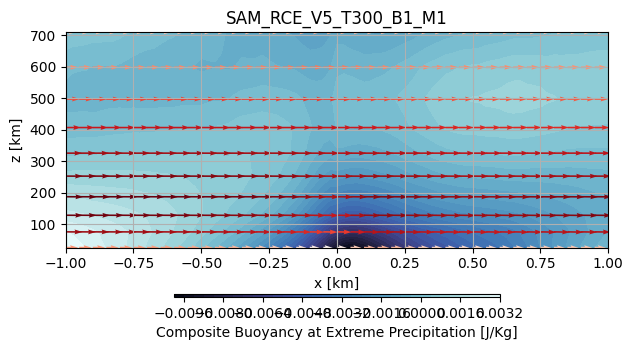

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


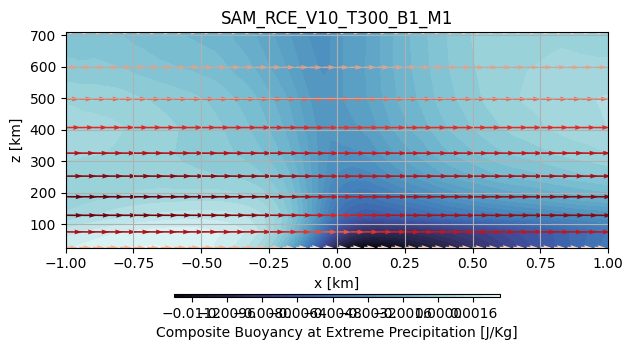

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


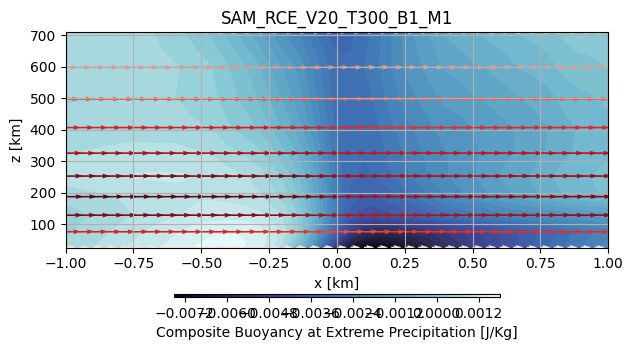

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


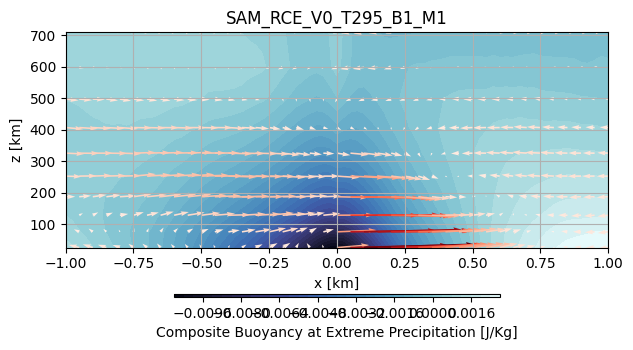

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


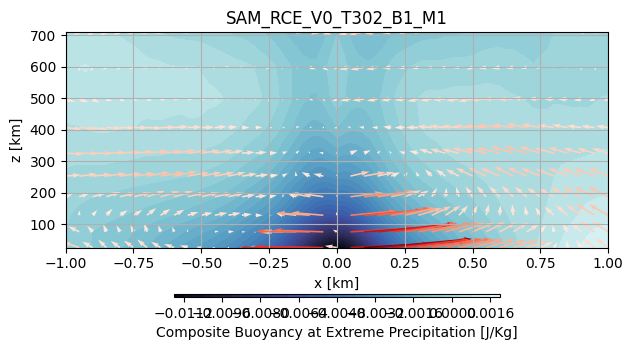

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


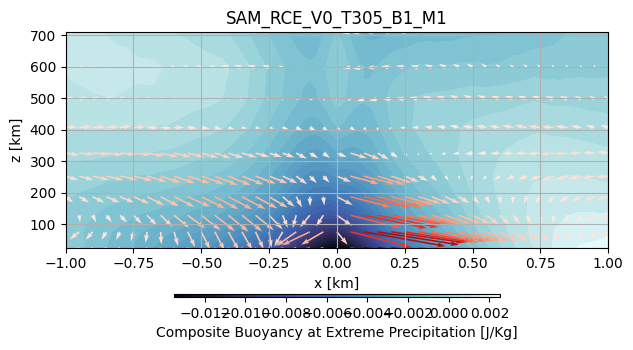

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


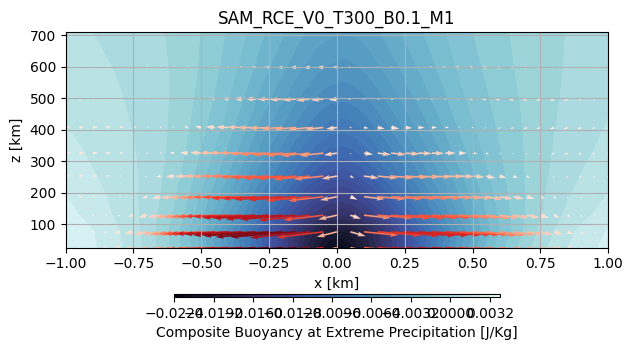

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


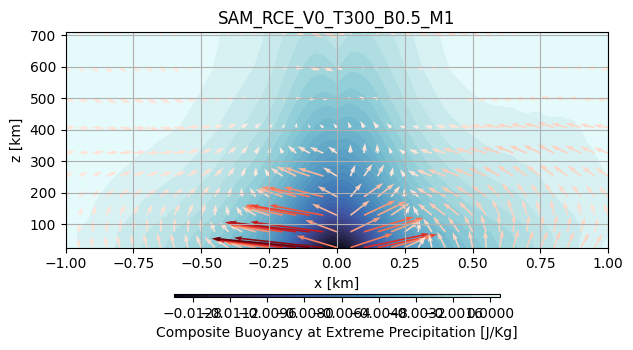

 ... (more hidden) ...


In [44]:
for simu in tqdm(simu_list):
    simu.set_composite_variables(data_name='BUOYANCY', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_computed_3d')
                                
    simu.set_composite_variables(data_name='U', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_3d')

    simu.set_composite_variables(data_name='V', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_3d')
    plt.figure(figsize=(7,4))

    XX, ZZ = np.meshgrid(np.linspace(-1,1,81),simu.dataset_3d.z.values)
    im = plt.contourf(XX[:10,:], ZZ[:10,:], np.mean(simu.BUOYANCY_composite_Prec[:10,:,:], axis=1), 35, cmap=cmocean.cm.ice)

    norm = np.sqrt(np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2]**2 +np.mean(simu.V_composite_Prec[:10,:,:], axis=1)[:,::2]**2)
    im2 = plt.quiver(XX[:10,:][:,::2], ZZ[:10,:][:,::2], np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2], np.mean(simu.V_composite_Prec[:10,:,:], axis=1)[:,::2], [norm], cmap='Reds')
    
    plt.colorbar(im, orientation='horizontal', aspect=110, shrink=0.6, label='Composite Buoyancy at Extreme Precipitation [J/Kg]')
    plt.xlabel('x [km]')
    plt.ylabel('z [km]')
    plt.grid(True)
    plt.title(f'{simu.name}')
    plt.show()


In [3]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                velocity=velocity,
                temperature=temperature,
                bowen_ratio=bowen_ratio,
                microphysic=microphysic)

simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
simu_list.append(simu)

### add shear cases
for velocity in tqdm(['2.5', '5', '10', '20']):
    temperature='300'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add temp cases
for temperature in tqdm(['295', '302', '305']):
    velocity='0'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add bowen_ration cases
for bowen_ratio in tqdm(['0.1', '0.5']):
    velocity='0'
    temperature='300'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)



{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                    | 0/4 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64.nc'}


 25%|███████████████                                             | 1/4 [00:04<00:12,  4.21s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U5_SAM1MOM_B1_128x128x64.nc'}


 50%|██████████████████████████████                              | 2/4 [00:08<00:08,  4.34s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U10_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U10_SAM1MOM_B1_128x128x64.nc'}


 75%|█████████████████████████████████████████████               | 3/4 [00:12<00:04,  4.18s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U20_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U20_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                    | 0/3 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T295_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T295_U0_SAM1MOM_B1_128x128x64.nc'}


 33%|████████████████████                                        | 1/3 [00:05<00:10,  5.19s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T302_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T302_U0_SAM1MOM_B1_128x128x64.nc'}


 67%|████████████████████████████████████████                    | 2/3 [00:10<00:05,  5.19s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T305_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T305_U0_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                    | 0/2 [00:00<?, ?it/s]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64.nc'}


 50%|██████████████████████████████                              | 1/2 [00:04<00:04,  4.52s/it]

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64.nc'}


100%|████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.65s/it]


In [4]:
[simu.name for simu in simu_list]

['SAM_RCE_V0_T300_B1_M1',
 'SAM_RCE_V2.5_T300_B1_M1',
 'SAM_RCE_V5_T300_B1_M1',
 'SAM_RCE_V10_T300_B1_M1',
 'SAM_RCE_V20_T300_B1_M1',
 'SAM_RCE_V0_T295_B1_M1',
 'SAM_RCE_V0_T302_B1_M1',
 'SAM_RCE_V0_T305_B1_M1',
 'SAM_RCE_V0_T300_B0.1_M1',
 'SAM_RCE_V0_T300_B0.5_M1']

  0%|                                                                                                                                      | 0/10 [00:00<?, ?it/s]

Explained variance ratio: [0.06680266 0.02313766 0.01774651]
Principal components shape: (3, 3200)


 20%|█████████████████████████▏                                                                                                    | 2/10 [00:00<00:01,  4.03it/s]

Explained variance ratio: [0.05899255 0.02298389 0.01643587]
Principal components shape: (3, 3200)
Explained variance ratio: [0.05929437 0.0219873  0.01843494]
Principal components shape: (3, 3200)


 40%|██████████████████████████████████████████████████▍                                                                           | 4/10 [00:00<00:01,  5.22it/s]

Explained variance ratio: [0.0714657  0.0436117  0.02132492]
Principal components shape: (3, 3200)
Explained variance ratio: [0.12118351 0.0267674  0.02337821]
Principal components shape: (3, 3200)


 60%|███████████████████████████████████████████████████████████████████████████▌                                                  | 6/10 [00:01<00:00,  5.18it/s]

Explained variance ratio: [0.10318872 0.04404423 0.03347324]
Principal components shape: (3, 3200)
Explained variance ratio: [0.05506541 0.01942012 0.0175236 ]
Principal components shape: (3, 3200)


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 8/10 [00:01<00:00,  5.95it/s]

Explained variance ratio: [0.0850384  0.02240783 0.01870368]
Principal components shape: (3, 3200)
Explained variance ratio: [0.17277822 0.09720162 0.03629466]
Principal components shape: (3, 3200)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.05it/s]


Explained variance ratio: [0.07685263 0.02973233 0.02343186]
Principal components shape: (3, 3200)


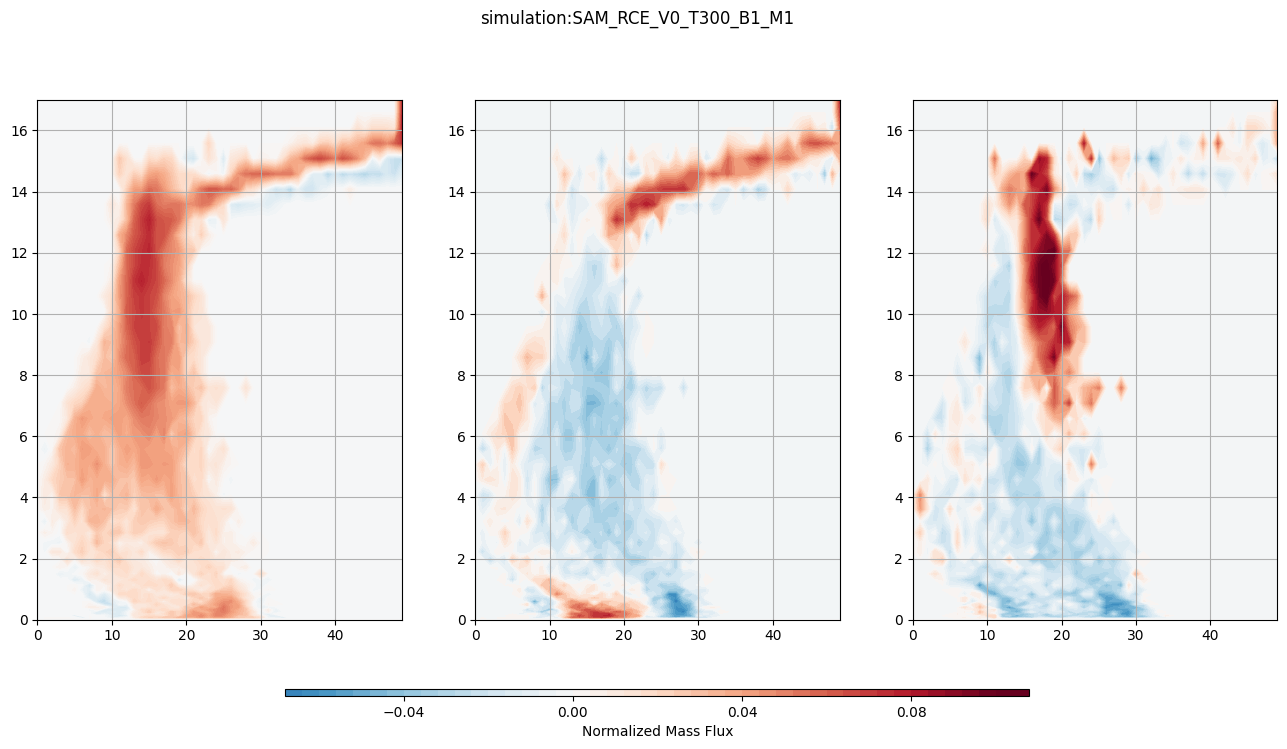

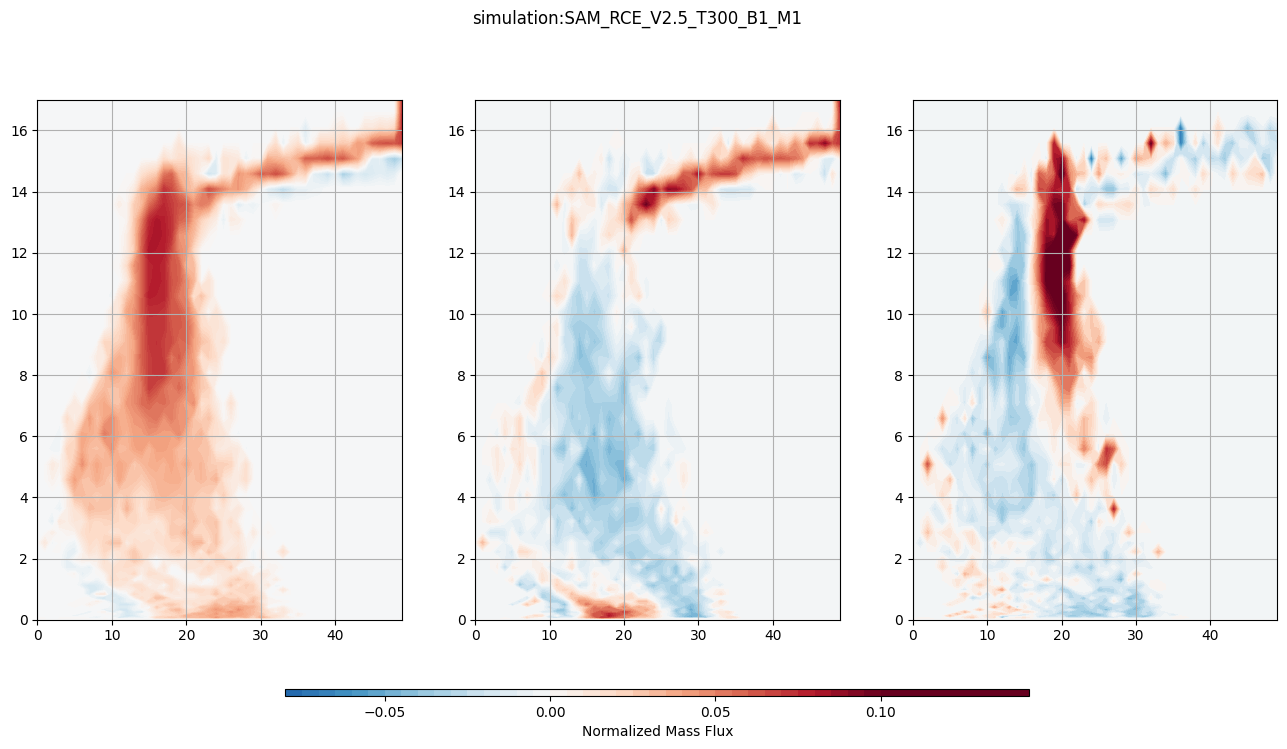

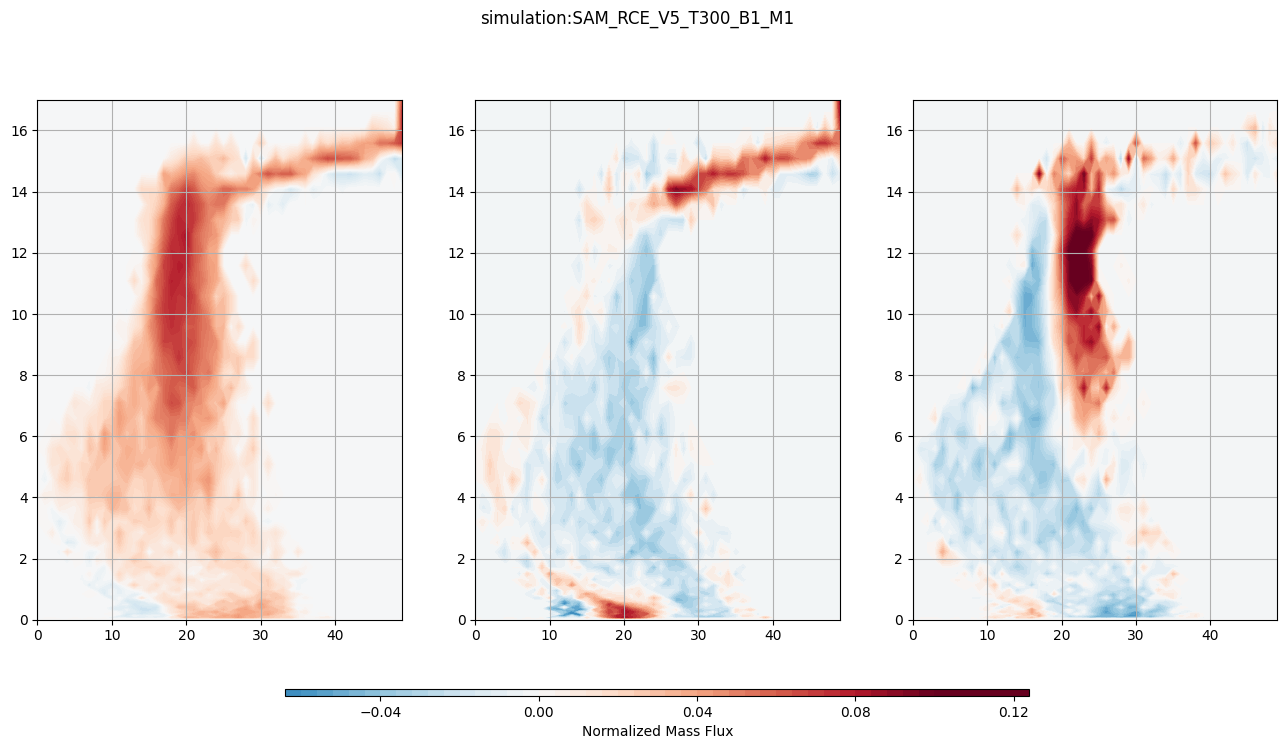

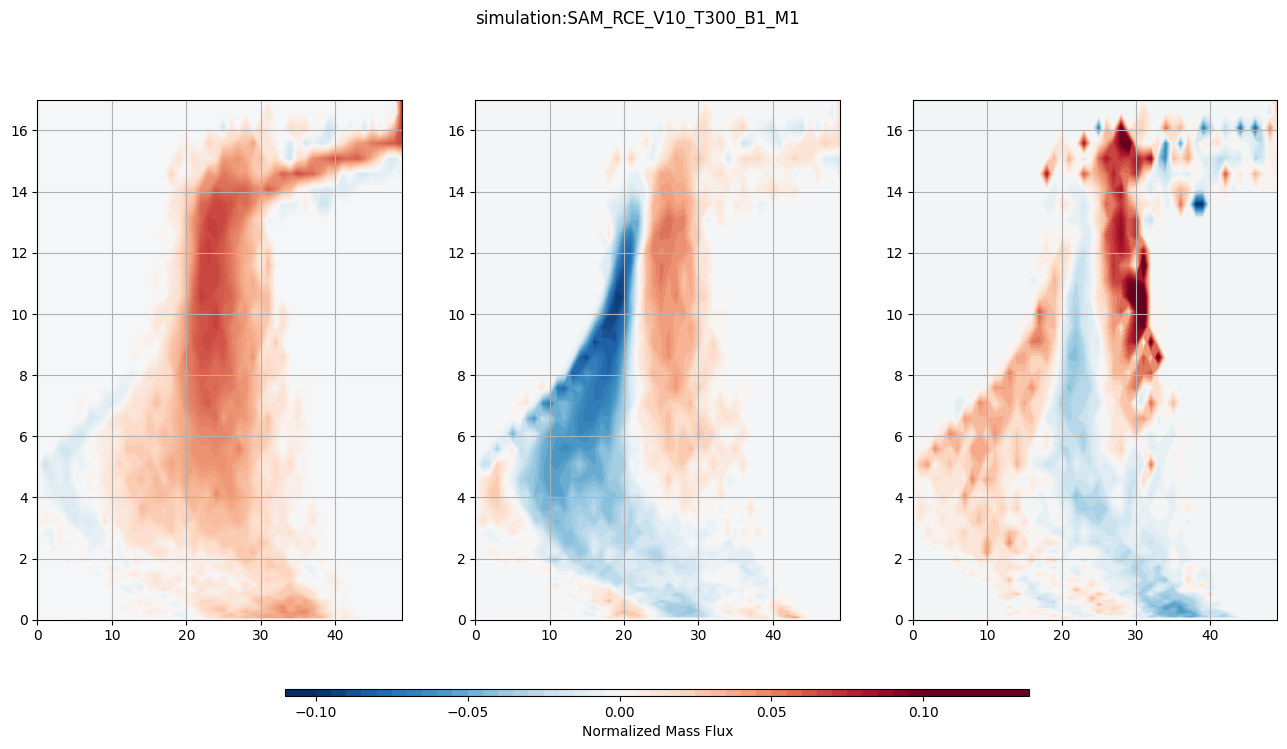

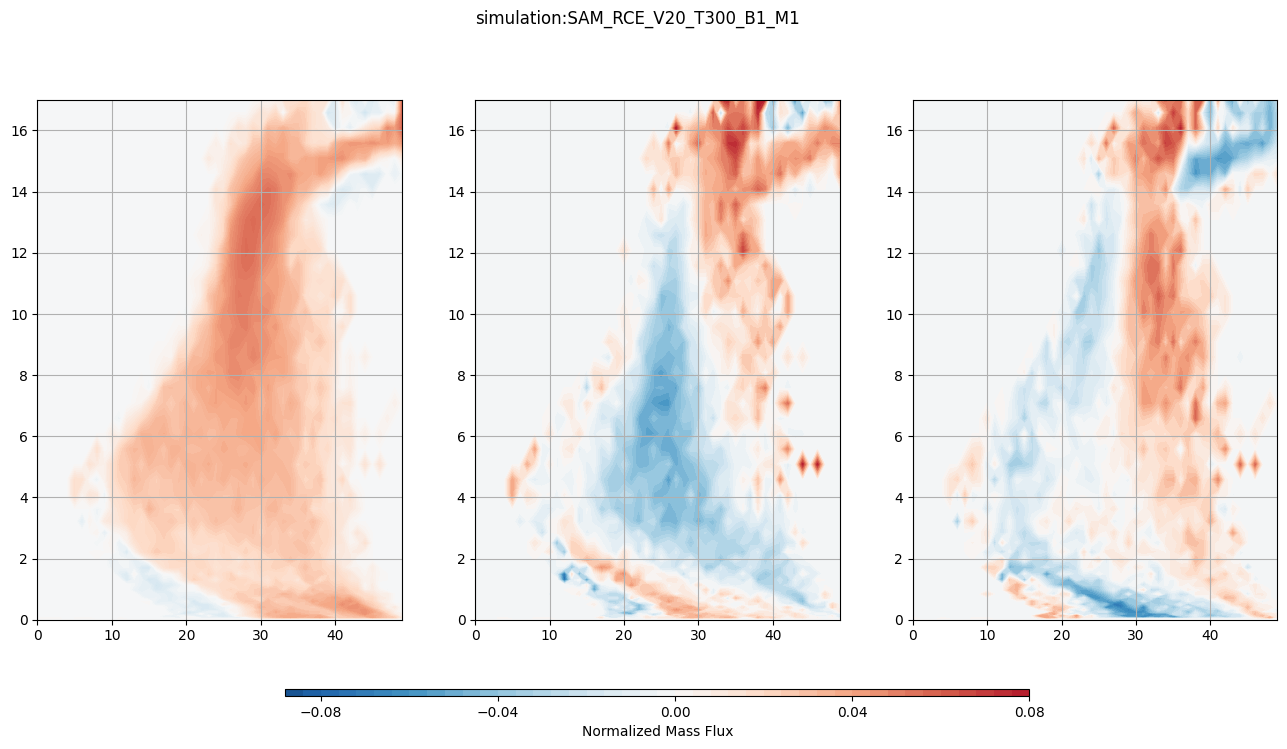

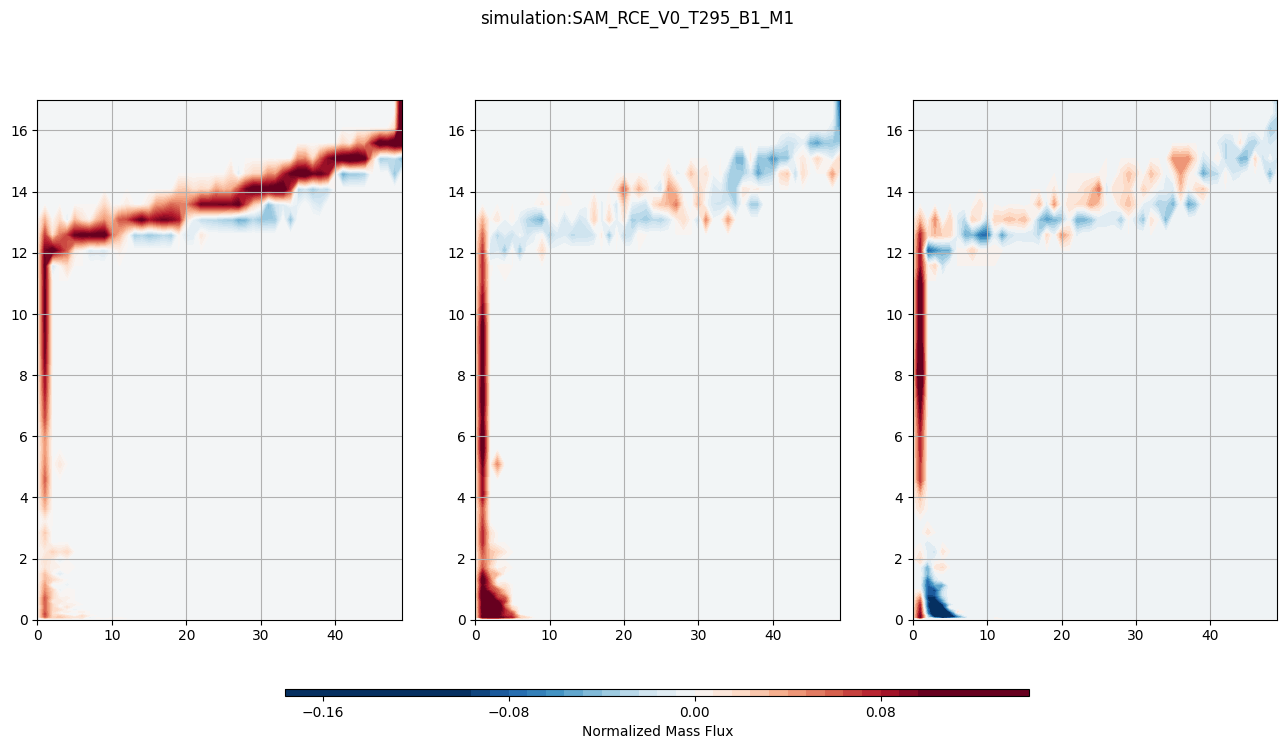

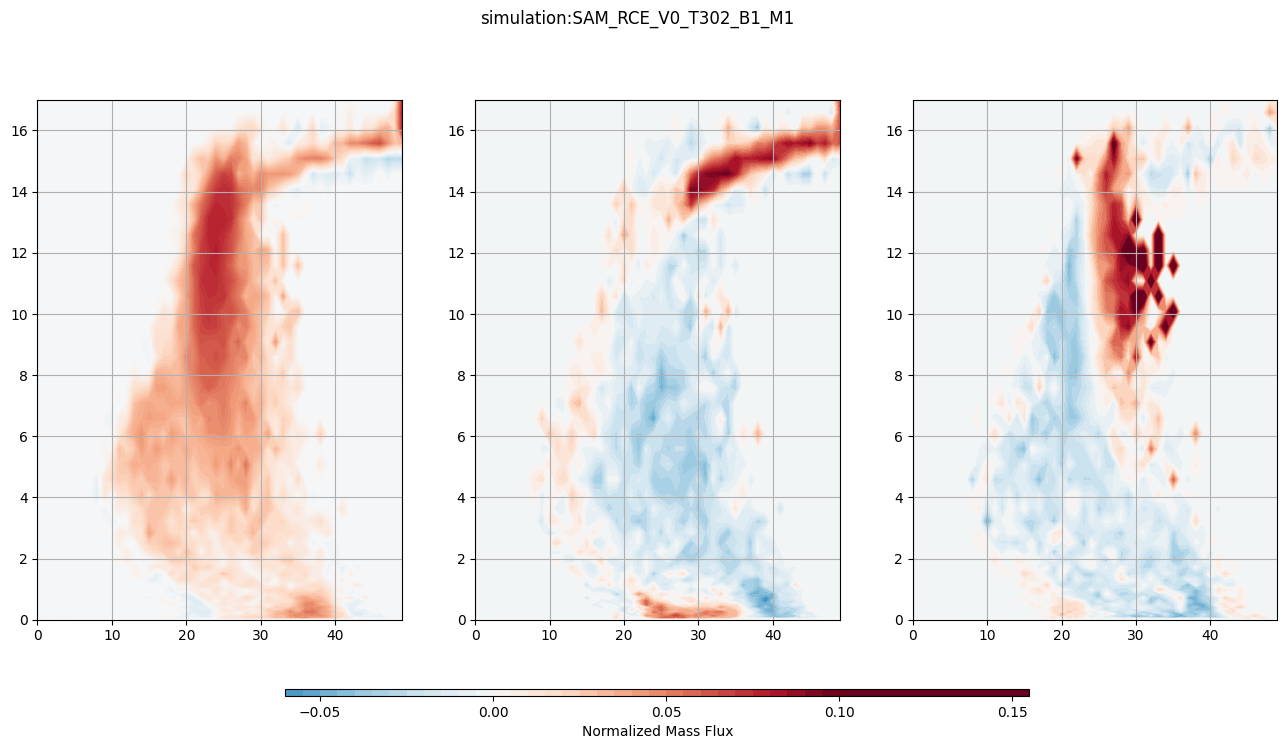

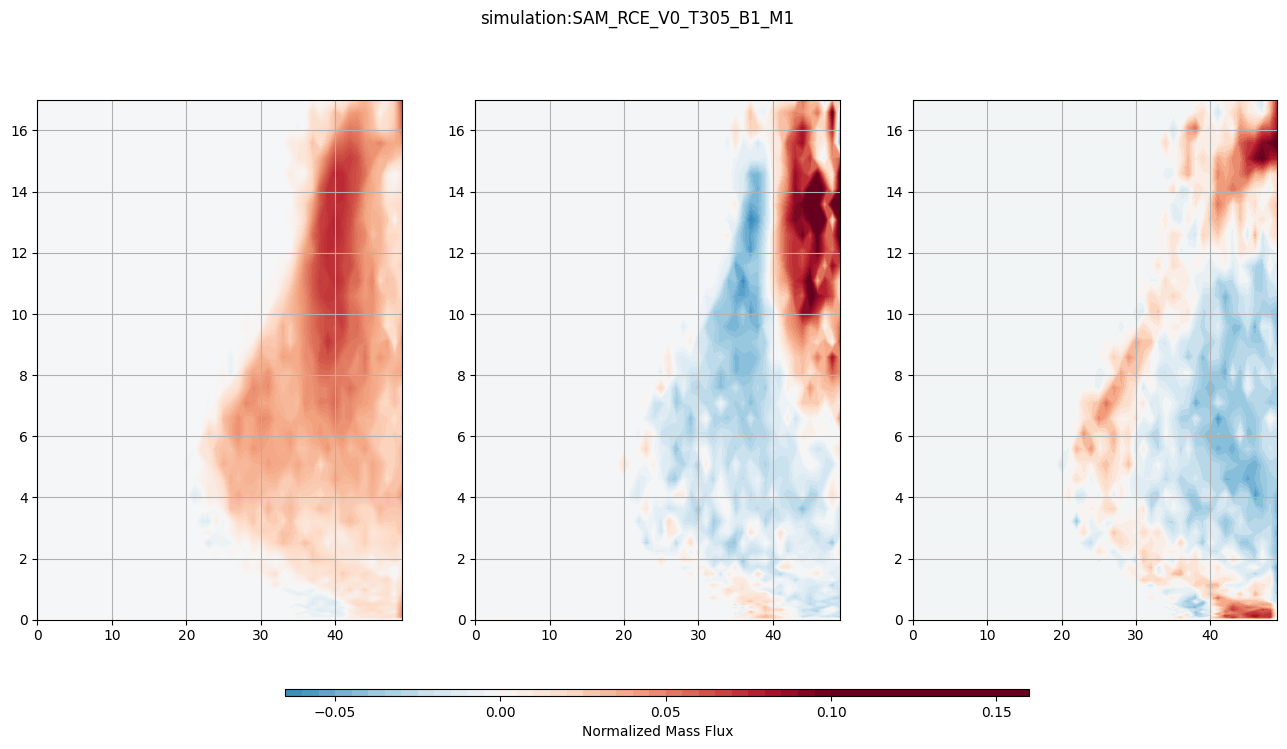

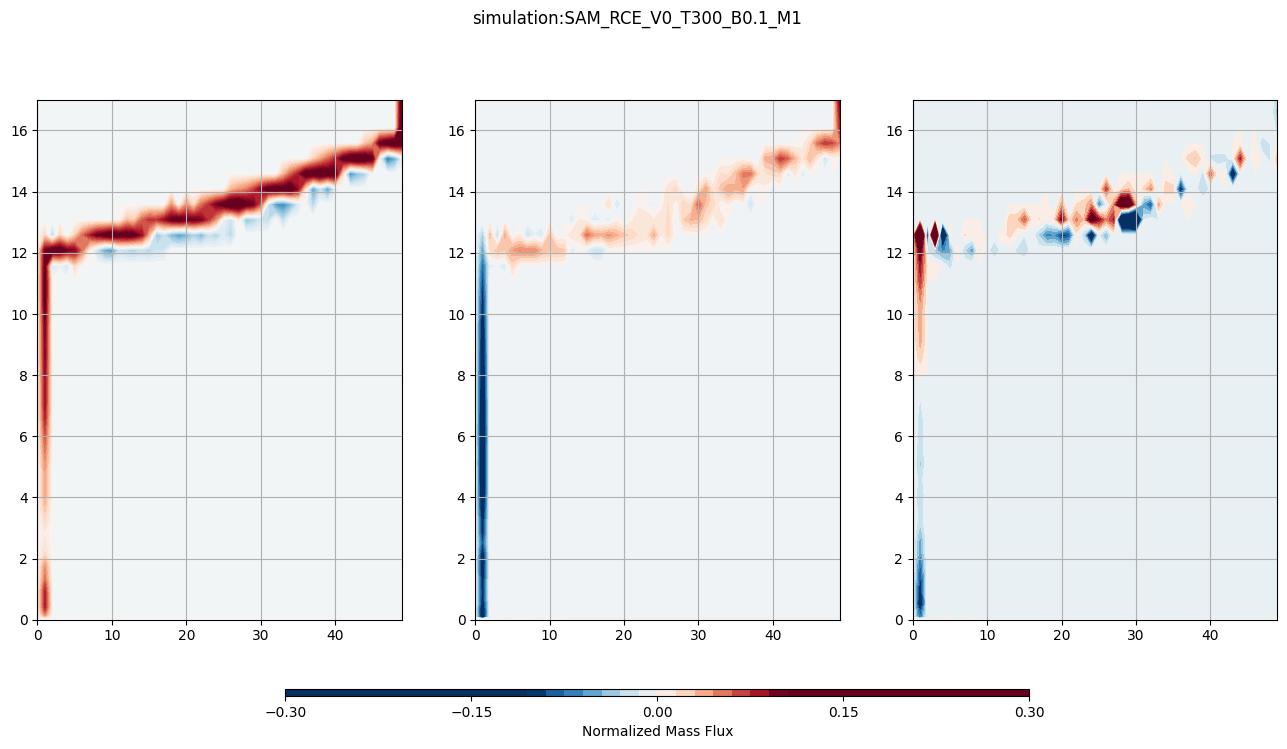

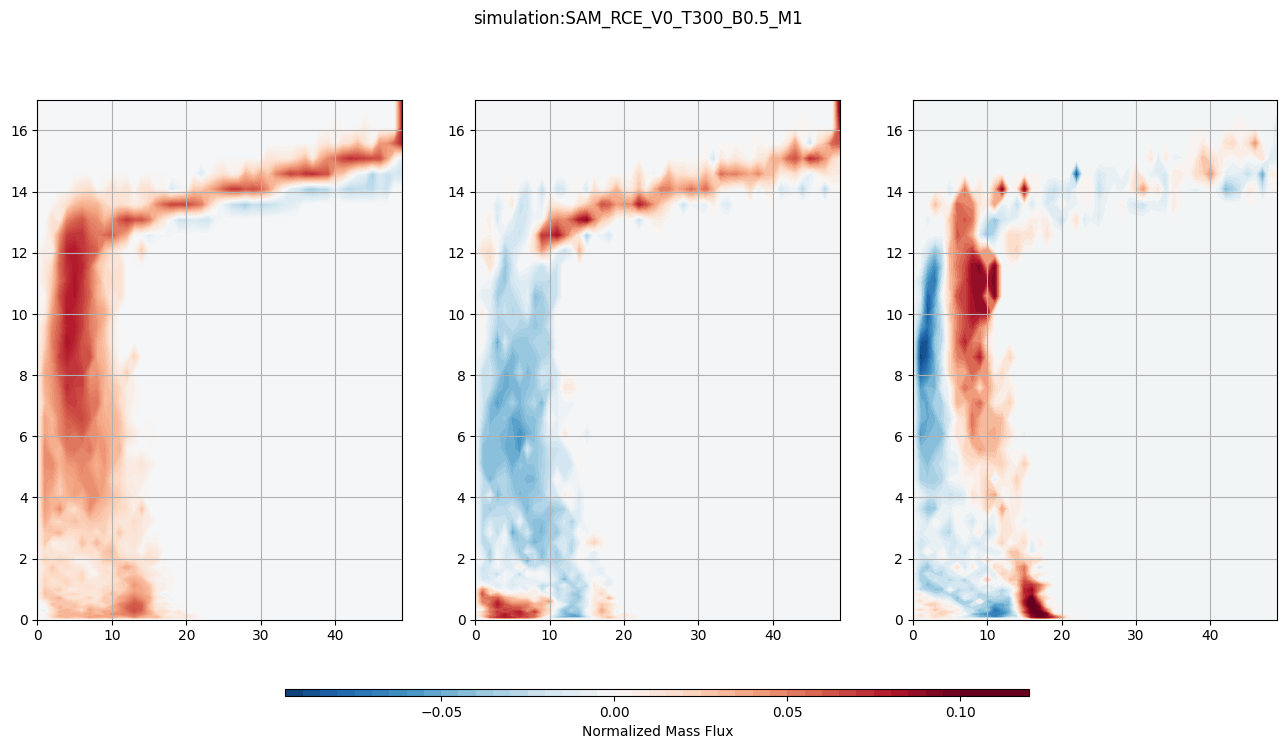

In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import ticker

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,YY = np.meshgrid(fmse, z)

for i_simu in tqdm(range(len(simu_list))):

    RHO_W = simu_list[i_simu].dataset_isentropic.RHO_W.values

    # Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
    # Step 1: Replace NaN values with -10
    RHO_W_clean = np.nan_to_num(RHO_W, nan=0)

    # Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
    nt, n_x, n_y = RHO_W_clean.shape
    reshaped_RHO_W = RHO_W_clean.reshape(nt, n_x * n_y)

    # Step 3: Standardize the data (mean = 0, variance = 1)
    scaler = StandardScaler()
    standardized_RHO_W = scaler.fit_transform(reshaped_RHO_W)

    # Step 4: Apply PCA
    n_components = 3  # Set the number of principal components you want to keep
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(standardized_RHO_W)

    # Access PCA results:
    explained_variance_ratio = pca.explained_variance_ratio_
    principal_components = pca.components_

    # Outputs:
    print("Explained variance ratio:", explained_variance_ratio)
    print("Principal components shape:", principal_components.shape)

    fig, ax = plt.subplots(1,n_components, figsize=(16,9))
    # Step 5: Visualize the spatial modes (only for valid points)
    for i in range(n_components):
        # Create an empty grid and fill valid points
        #spatial_mode = np.zeros((n_x, n_y))*np.nan
        spatial_mode = pca.components_[i].reshape(n_x, n_y)

        #print(np.min(pca.components_[i]), print(np.max(pca.components_[i])))


        im = ax[i].contourf(XX,YY, spatial_mode, 50, cmap='RdBu_r', vmin=-0.1,vmax = 0.1 )
        ax[i].grid(True)

        #ax[i].set_title(f'explained variance: {pca.explained_variance_ratio_[i]}')
        ax[i].set_ylim(0,17)

    fig.suptitle(f'simulation:{simu_list[i_simu].name}')
    cb = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, aspect=110, pad=0.1, label='Normalized Mass Flux')
    #cb = plt.colorbar(im, shrink=0.6, orientation='horizontal')
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()

        #plt.show()

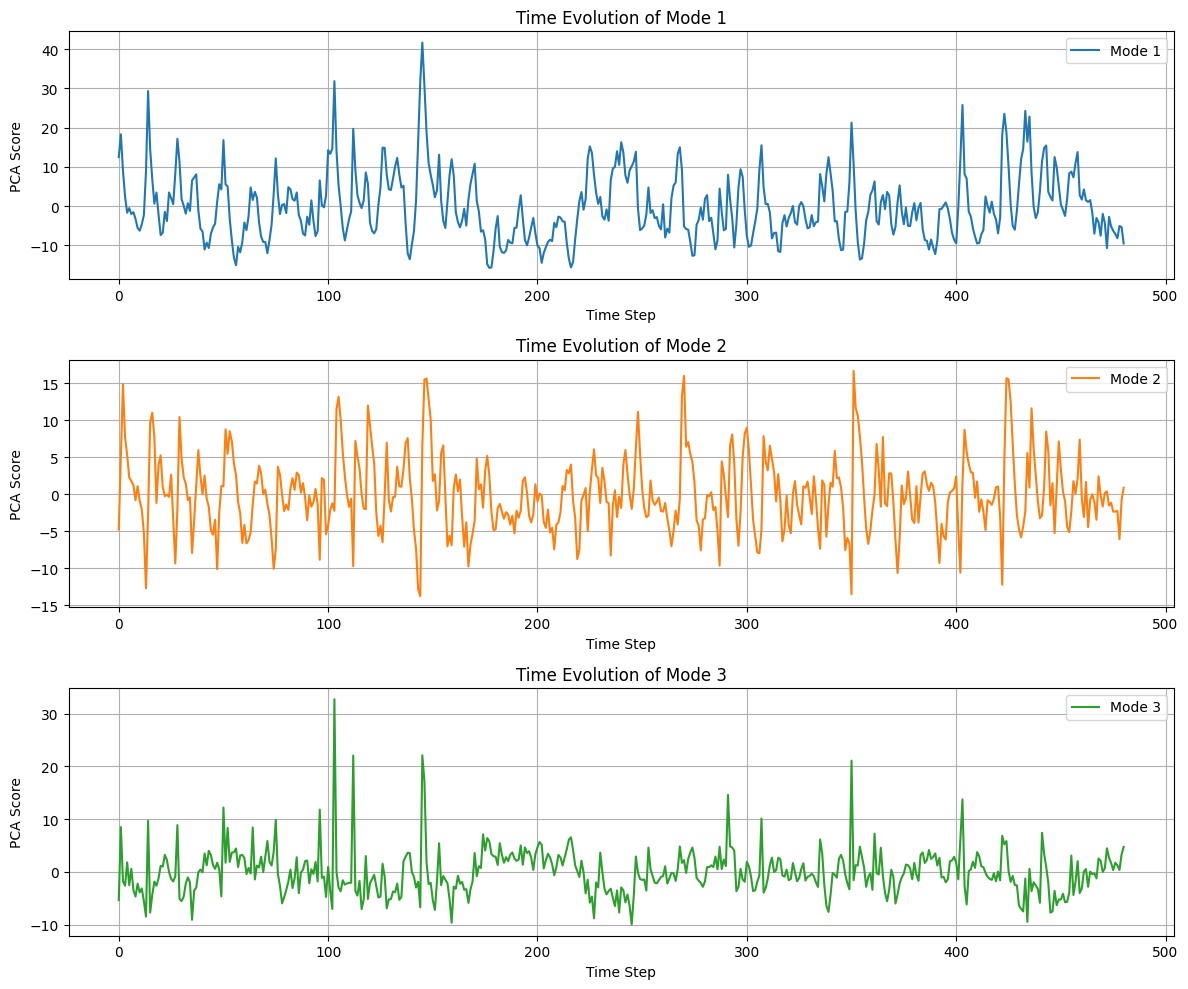

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result is the result of the PCA, which has shape (nt, n_components)
# Where nt is the number of timesteps, and n_components is the number of PCA modes

# Step 1: Get PCA scores (time evolution of modes)
# pca_result is already your PCA scores, as we computed before.

# Step 2: Plot the time evolution of each PCA mode
n_components = pca_result.shape[1]  # Number of PCA components

plt.figure(figsize=(12, 10))
for i in range(n_components):
    plt.subplot(n_components, 1, i + 1)  # Create a subplot for each component
    plt.plot(pca_result[:, i], label=f'Mode {i + 1}', color=f'C{i}')  # Plot scores over time
    plt.title(f'Time Evolution of Mode {i + 1}')
    plt.xlabel('Time Step')
    plt.ylabel('PCA Score')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [50]:
[simu.name for simu in simu_list]

['SAM_RCE_V0_T300_B1_M1',
 'SAM_RCE_V2.5_T300_B1_M1',
 'SAM_RCE_V5_T300_B1_M1',
 'SAM_RCE_V10_T300_B1_M1',
 'SAM_RCE_V20_T300_B1_M1',
 'SAM_RCE_V0_T295_B1_M1',
 'SAM_RCE_V0_T302_B1_M1',
 'SAM_RCE_V0_T305_B1_M1',
 'SAM_RCE_V0_T300_B0.1_M1',
 'SAM_RCE_V0_T300_B0.5_M1']

In [ ]:
[0, 1, 2, 3, 4]

In [14]:
RHO_W_new = simu_list[3].dataset_isentropic.RHO_W.values

100%|████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.82it/s]


(-10.0, 10.0)

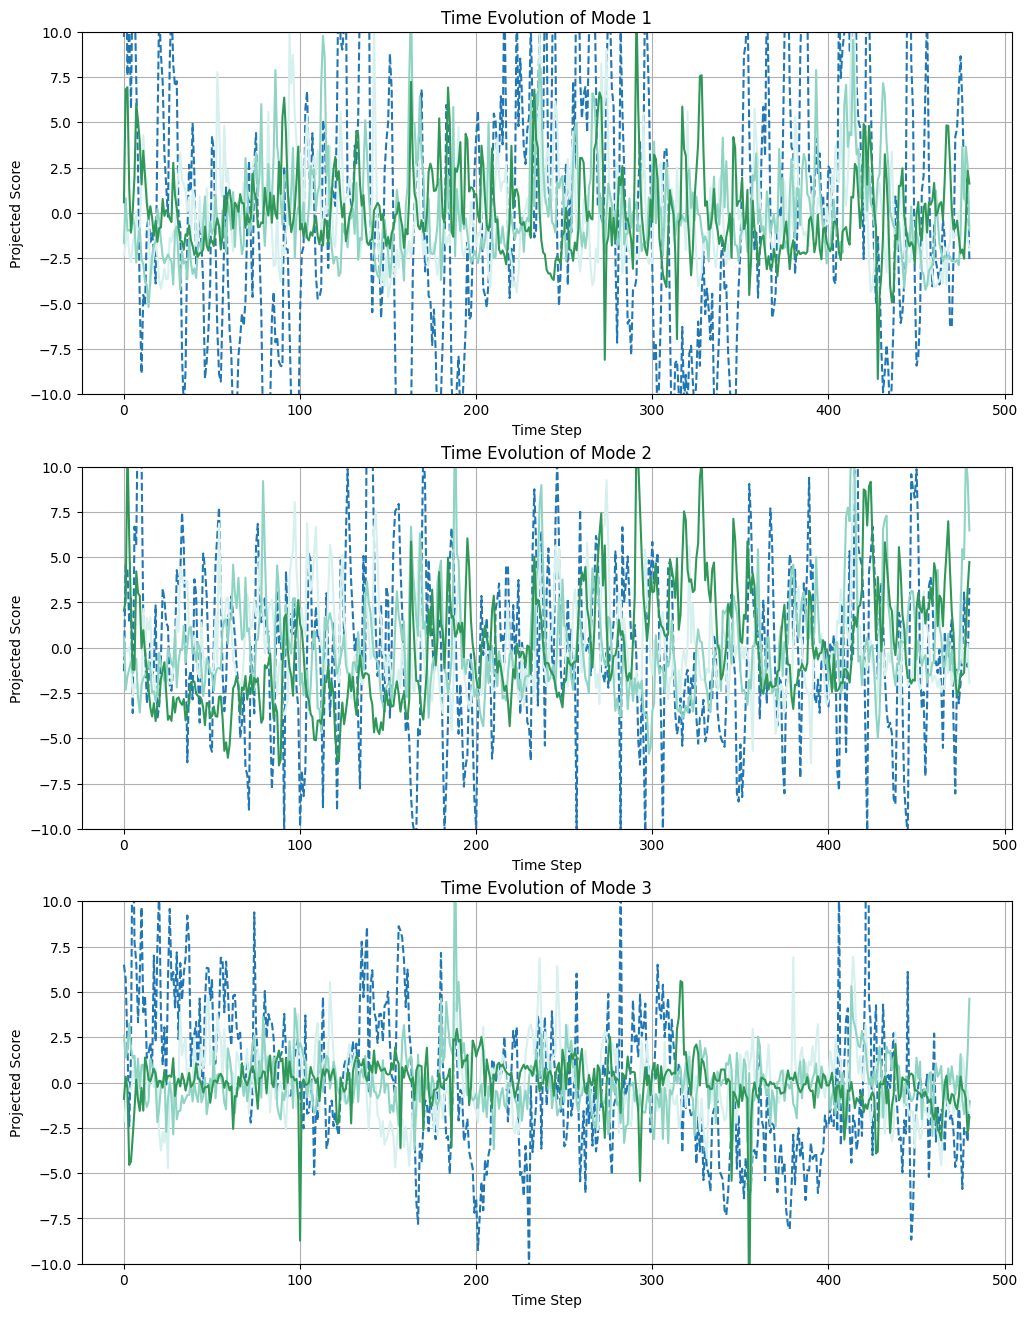

In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(3,1, figsize=(12, 16))
for i in range(n_components):

    #ax[i].hist(pca_result[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--', bins=50)  # Plot scores over time
    ax[i].plot(pca_result[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--')  # Plot scores over time


#for i_simu in tqdm(range(1,len(simu_list))):
for i_simu in tqdm(range(1,4)):
    RHO_W_new = simu_list[i_simu].dataset_isentropic.RHO_W.values

    # Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
    # Step 1: Replace NaN values with -10
    RHO_W_clean_new = np.nan_to_num(RHO_W_new, nan=0)

    # Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
    nt, n_x, n_y = RHO_W_clean_new.shape
    reshaped_RHO_W_new = RHO_W_clean_new.reshape(nt, n_x * n_y)

    # Step 3: Standardize the data (mean = 0, variance = 1)
    scaler = StandardScaler()
    standardized_RHO_W_new = scaler.fit_transform(reshaped_RHO_W_new)




    # Step 3: Project the new data onto the PCA components from the previous analysis
    # Assuming 'pca.components_' holds the spatial modes from the original PCA
    # pca.components_.shape should be (n_components, n_x * n_y)
    projected_scores = standardized_RHO_W_new.dot(pca.components_.T)  # Shape: (nt_new, n_components)

    # Step 4: Plot the time evolution of the new data projected onto the old modes
    import matplotlib.pyplot as plt

    n_components = projected_scores.shape[1]  # Number of PCA components

    
    for i in range(n_components):
        ax[i].plot(projected_scores[:, i], label=f'Mode {i + 1}', color=simu_list[i_simu].color)
        #ax[i].hist(projected_scores[:, i], label=f'Mode {i + 1}', color=simu_list[i_simu].color, alpha=0.6, bins=30)
        ax[i].grid()
        #ax[i].plot(pca_result[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--')  # Plot scores over time

        ax[i].set_title(f'Time Evolution of Mode {i + 1}')
        ax[i].set_xlabel('Time Step')
        ax[i].set_ylabel('Projected Score')

ax[0].set_ylim(-10,10)
ax[1].set_ylim(-10,10)
ax[2].set_ylim(-10,10)
#ax[i].legend()

